In [1]:
!pip install --upgrade pip
!pip install pandas scikit-learn matplotlib

In [2]:
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.dummy import DummyClassifier

/tmp/ipykernel_240129/294078879.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
fontsize = 12
plt.rcParams.update({'font.size': fontsize})
cmap = matplotlib.colormaps['tab10']
blue = cmap(0)
green = cmap(2)
yellow = cmap(8)

## Class Distribution

In [4]:
classes = np.unique(np.load(os.path.join('Arrays', 'Donut', 'y_true.npy')))
classes

array(['credit_note', 'debit_note', 'order', 'proforma', 'purchase_order',
       'receipt', 'sales_order', 'tax_invoice', 'utility_bill'],
      dtype='<U14')

In [5]:
arrays = ['y_train', 'y_test', 'y_val']
y_true = np.concatenate([np.load(os.path.join('Arrays', f'{array}.npy')) for array in arrays])
y_true = np.array([classes[np.argmax(sample)] for sample in y_true])
y_true.shape

(19393,)

In [6]:
counts = pd.Series(y_true).value_counts(ascending=True)
counts

debit_note           7
utility_bill        18
proforma            33
credit_note         35
receipt           1121
sales_order       2122
purchase_order    3167
order             5605
tax_invoice       7285
Name: count, dtype: int64

In [7]:
# classes_ger = ['Lastschrift', 'Strom- und\nGasrechnung', 'Proforma', 'Gutschrift', 'Beleg', 'Kunden-\nauftrag', 'Auftrags-\nbestätigung', 'Auftrag', 'Steuer-\nrechnung']
# counts.index = classes_ger
# counts

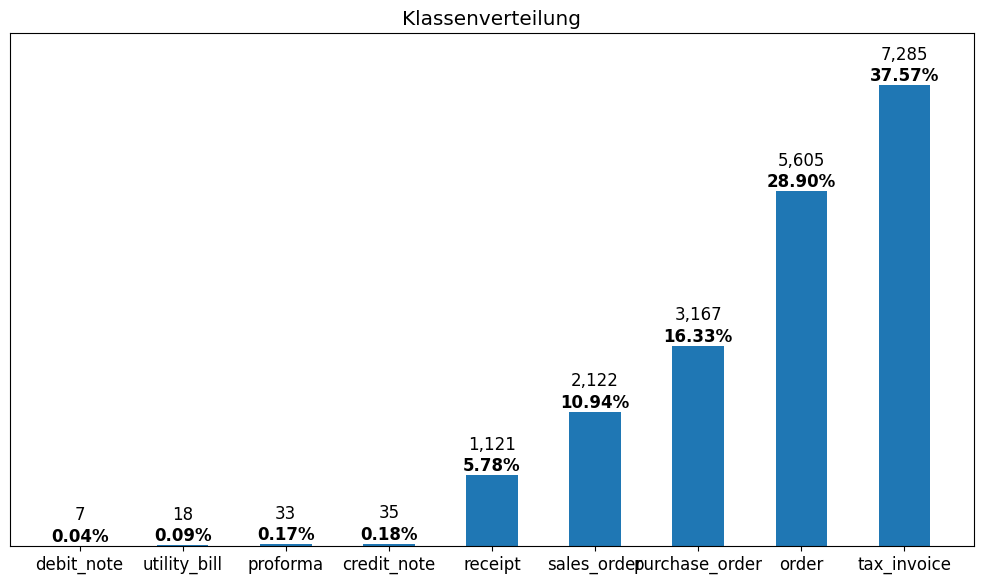

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(x=counts.index, height=counts.values, width=0.5)

# Displaying percentages above each bar
for i, count in enumerate(counts.values):
    perc = count / len(y_true) * 100
    plt.text(i, count + 400, f'{count:,}', ha='center', fontsize=fontsize, weight='normal')  # First row normal
    plt.text(i, count + 60, f'{perc:.2f}%', ha='center', fontsize=fontsize, weight='bold')  # Second row bold

plt.title('Klassenverteilung')
plt.ylim(0, 8100)
plt.yticks([])
plt.tight_layout()
plt.savefig(os.path.join('Plots', 'class_distribution.png'), bbox_inches='tight')

plt.show()

## Baseline

### Dummy Classifier

In [9]:
strategies = ['most_frequent', 'stratified']
classifiers = ['Baseline\nMost\nFrequent Class', 'Baseline\nWeighted\nGuessing']
baselines = []

for strategy, classifier in zip(strategies, classifiers):
    clf = DummyClassifier(strategy=strategy, random_state=0)
    clf.fit(X=None, y=y_true)
    y_pred = clf.predict(y_true)
    balanced_accuracy = metrics.balanced_accuracy_score(y_true, y_pred)
    result = {
        'classifier': classifier,
        'type': 'DummyClassifier',
        'balanced_accuracy': balanced_accuracy
    }
    baselines.append(result)
    
baselines_df = pd.DataFrame(baselines)
baselines_df

,classifier,type,balanced_accuracy
0,Baseline\nMost\nFrequent Class,DummyClassifier,0.111111
1,Baseline\nWeighted\nGuessing,DummyClassifier,0.108908


In [10]:
def evaluate(classifier, y_true, y_pred):
    balanced_accuracy = metrics.balanced_accuracy_score(y_true, y_pred)
    print(f'{classifier} balanced accuracy: {balanced_accuracy:.4f}')
    
    results.append(result)

### Zero Rate and Random Rate

In [11]:
def zero_rate(class_frequencies):
    return max(class_frequencies)

def random_rate(class_frequencies):
    return sum([class_frequency ** 2 for class_frequency in class_frequencies])

In [12]:
class_frequencies = pd.Series(y_true).value_counts(normalize=True).values
print(f'zero rate: {zero_rate(class_frequencies):.4f}')
print(f'random rate: {random_rate(class_frequencies):.4f}')

zero rate: 0.3757
random rate: 0.2666


## Donut Classification

In [13]:
# Load the predictions of the best donut model
donut_y_pred = np.load(os.path.join('Arrays', 'DonutClassification', f'10epochs_y_pred.npy')).tolist()
evaluate('Donut', y_true, donut_y_pred)

FileNotFoundError: [Errno 2] No such file or directory: 'Arrays/DonutClassification/10epochs_y_pred.npy'

In [ ]:
pd.DataFrame(results)

In [ ]:
epoch_counts = ['10', '20', '30']
results_donut = []

for epochs in epoch_counts:
    y_pred = np.load(os.path.join('Arrays', 'DonutClassification', f'{epochs}epochs_y_pred.npy'))
    result = {
        'classifier': f'Donut\n{epochs} Epochs',
        'balanced_accuracy': metrics.balanced_accuracy_score(y_true, y_pred)
    }
    results_donut.append(result)
    
results_donut.insert(0, results[0])
results_donut.insert(1, results[1])
results_donut_df = pd.DataFrame(results_donut)

colors = [blue, blue, green, green, green]
plt.figure(figsize=(8, 6))
plt.bar(x=results_donut_df['classifier'], height=results_donut_df['balanced_accuracy'], width=0.5, color=colors)
plt.title('Donut Balanced Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.ylim(0, 1)

# Displaying percentages above each bar
for i, score in enumerate(results_donut_df['balanced_accuracy']):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center', fontsize=fontsize, weight='normal')

plt.tight_layout()
plt.savefig(os.path.join('Plots', 'donut_balanced_accuracy.png'), bbox_inches='tight')
plt.show()

## VGG16 Classification

In [ ]:
def evaluate_cnn(cnn):
    layers_versions = ['added_layer', 'all_layer']
    layers_versions_pretty = ['Added Layers', 'All Layers']
    epoch_counts = ['30', '50', '100']
    y_true = np.load(os.path.join('Arrays', cnn, f'y_test.npy'))
    y_true = [classes[np.argmax(sample)] for sample in y_true]
    results_cnn = []
    
    for layers, layers_pretty in zip(layers_versions, layers_versions_pretty):
        for epochs in epoch_counts:
            y_pred = np.load(os.path.join('Arrays', cnn, f'predictions_{layers}_{epochs}epochs_10_5.npy'))
            balanced_accuracy = metrics.balanced_accuracy_score(y_true, y_pred)
            result = {
                'classifier': f'{cnn}\n{layers_pretty}\n{epochs} Epochs',
                'balanced_accuracy': balanced_accuracy
            }
            results_cnn.append(result)
    
    results_cnn.insert(0, results[0])
    results_cnn.insert(1, results[1])
    results_cnn_df = pd.DataFrame(results_cnn)
    
    colors = [blue, blue, green, green, green, yellow, yellow, yellow]
    plt.figure(figsize=(11, 6))
    plt.bar(x=results_cnn_df['classifier'], height=results_cnn_df['balanced_accuracy'], width=0.5, color=colors)
    
    plt.title(f'{cnn} Balanced Accuracy')
    
    plt.xlabel('Classifier')
    
    plt.ylabel('Score')
    plt.ylim(0, 1)
    
    # Displaying percentages above each bar
    for i, score in enumerate(results_cnn_df['balanced_accuracy']):
        plt.text(i, score + 0.01, f'{score:.2f}', ha='center', fontsize=fontsize, weight='normal')
    
    plt.tight_layout()
    plt.savefig(os.path.join('Plots', f'{cnn.lower()}_balanced_accuracy.png'), bbox_inches='tight')
    plt.show()

In [ ]:
# Load the predictions of the best VGG16 model
vgg16_y_true = np.load(os.path.join('Arrays', 'VGG16', f'y_test.npy'))
vgg16_y_true = [classes[np.argmax(sample)] for sample in vgg16_y_true]
vgg16_y_pred = np.load(os.path.join('Arrays', 'VGG16', f'predictions_all_layer_50epochs_10_5.npy'))
evaluate('VGG16', vgg16_y_true, vgg16_y_pred)

In [ ]:
pd.DataFrame(results)

In [ ]:
evaluate_cnn('VGG16')

## InceptionV3 Classification

In [ ]:
# Load the predictions of the best InceptionV3 model
inceptionv3_y_true = np.load(os.path.join('Arrays', 'InceptionV3', f'y_test.npy'))
inceptionv3_y_true = [classes[np.argmax(sample)] for sample in inceptionv3_y_true]
inceptionv3_y_pred = np.load(os.path.join('Arrays', 'InceptionV3', f'predictions_all_layer_100epochs_10_5.npy'))
evaluate('InceptionV3', inceptionv3_y_true, inceptionv3_y_pred)

In [ ]:
pd.DataFrame(results)

In [ ]:
evaluate_cnn('InceptionV3')

## LayoutLMv3 Classification

In [ ]:
# Load the predictions of the best LayoutLMv3 model
layoutlmv3_y_true = np.load(os.path.join('Arrays', 'LayoutLMv3', f'truelabels.npy'), allow_pickle=True)
layoutlmv3_y_pred = np.load(os.path.join('Arrays', 'LayoutLMv3', f'predictions_50Epochs.npy'), allow_pickle=True)
evaluate('LayoutLMv3', layoutlmv3_y_true, layoutlmv3_y_pred)

In [ ]:
epoch_counts = ['30', '50', '100']
results_layoutlmv3 = []

for epochs in epoch_counts:
    y_pred = np.load(os.path.join('Arrays', 'LayoutLMv3', f'predictions_{epochs}Epochs.npy'))
    result = {
        'classifier': f'LayoutLMv3\n{epochs} Epochs',
        'balanced_accuracy': metrics.balanced_accuracy_score(layoutlmv3_y_true, y_pred)
    }
    results_layoutlmv3.append(result)
    
results_layoutlmv3.insert(0, results[0])
results_layoutlmv3.insert(1, results[1])
results_layoutlmv3_df = pd.DataFrame(results_layoutlmv3)

colors = [blue, blue, green, green, green]
plt.figure(figsize=(8, 6))
plt.bar(x=results_layoutlmv3_df['classifier'], height=results_layoutlmv3_df['balanced_accuracy'], width=0.5, color=colors)
plt.title('LayoutLMv3 Balanced Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.ylim(0, 1)

# Displaying percentages above each bar
for i, score in enumerate(results_layoutlmv3_df['balanced_accuracy']):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center', fontsize=fontsize, weight='normal')

plt.tight_layout()
plt.savefig(os.path.join('Plots', 'layoutlmv3_balanced_accuracy.png'), bbox_inches='tight')
plt.show()

## Bar Chart

In [ ]:
y_true = np.load(os.path.join('Arrays', 'DonutClassification', f'10epochs_y_real.npy'))
X = np.zeros((len(y_true), 1))
results = []
classes = np.unique(y_true)
classes

In [ ]:
results_df = pd.DataFrame(results)

colors = [blue, blue, green, green, green, green]
plt.figure(figsize=(8, 6))
plt.bar(x=results_df['classifier'], height=results_df['balanced_accuracy'], width=0.5, color=colors)
plt.title('Balanced Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.ylim(0, 1)

# Displaying percentages above each bar
for i, score in enumerate(results_df['balanced_accuracy']):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center', fontsize=fontsize, weight='normal')

plt.tight_layout()
plt.savefig(os.path.join('Plots', 'balanced_accuracy.png'), bbox_inches='tight')
plt.show()